In [ ]:
from tkinter import * 
from tkinter import messagebox
from tkinter import filedialog
import cv2
import shutil
import os
import numpy as np
import pandas as pd
from PIL import Image, ImageTk
from tkinter import simpledialog
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from skimage.feature import local_binary_pattern
from sklearn.preprocessing import LabelEncoder

import time
import datetime
import string 
import pickle
import random

win=Tk()
win.state("zoomed")
win.resizable(width=False,height=False)
win.configure(bg="orange")
win.title("My project")

lbl_title=Label(win,text="Face Recognition",font=('',55,'bold','underline'),bg='orange')
lbl_title.pack()


#----------------------------------------Image---------------------------------------
imageFrame=None
import cv2
import pickle
from PIL import Image, ImageTk

imageFrame=None
import cv2
import pickle
from PIL import Image, ImageTk

def startface(frame, cv2image, lmain):
    clf = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = clf.detectMultiScale(gray, 1.2, 8)
    with open('trained_model.pkl', 'rb') as file:
        model = pickle.load(file)
    xi = []
    yi = []
    wi = []
    hi = []
    X_test = []
    for x, y, w, h in faces:
        
        gr = frame[y:y+h, x:x+w]
        gr = cv2.cvtColor(gr, cv2.COLOR_BGR2GRAY)
        gr = gr/255
        gr = cv2.resize(gr, (100, 100))
        gr = gr.flatten()
        X_test.append(gr)
        xi.append(x)
        yi.append(y)
        wi.append(w)
        hi.append(h)
    if(len(X_test) > 0):
        global pred, data_df

        with open('trained_model.pkl', 'rb') as file:
            model = pickle.load(file)
        
        pred = model.predict(np.array(X_test))
        
        for i in range(len(pred)):
            cv2.rectangle(cv2image, (xi[i], yi[i]), (xi[i] + wi[i], yi[i] + hi[i]), (255, 0, 0), 1)
            text_size = cv2.getTextSize(pred[i], cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, 1)[0]
            text_width, text_height = text_size[0], text_size[1]

            # Calculate position of text relative to image dimensions
            text_x = xi[i] + int((wi[i] - text_width) / 2)
            text_y = yi[i] + hi[i] + text_height + 10 if yi[i] - 10 > 10 else yi[i] + hi[i] + 20

            cv2.putText(cv2image, pred[i], (text_x, text_y), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0), 1)
            
        messagebox.showinfo(pred[i])



        
        

        

    img = Image.fromarray(cv2image)
    imgtk = ImageTk.PhotoImage(image=img)
    lmain.imgtk = imgtk
    lmain.configure(image=imgtk)


def browse():
    global imageFrame
    if imageFrame is not None:
        imageFrame.destroy()
    # Rest of your code

    file_path=filedialog.askopenfilename()
    frame=cv2.imread(file_path)
    cv2image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    
    imageFrame= Frame(width=700, height=500,bd=6,bg='black')
    lmain =Label(imageFrame)
    lmain.grid(row=0, column=0)
    imageFrame.place(relx=.37,rely=.3)
    img = Image.fromarray(cv2image)
    imgtk = ImageTk.PhotoImage(image=img)
    lmain.imgtk = imgtk
    lmain.configure(image=imgtk)
    btn_Detection=Button(command=lambda:startface(frame,cv2image,lmain),text='Detect face',font=('',20,'bold'),bd=10,width=12).place(relx=.4,rely=.9)
def image_screen():
    frm=Frame(win,bg='sky blue')
    frm.place(relx=0,rely=.15,relwidth=1,relheight=1)
 
    btn_Browse=Button(frm,command=lambda:browse(),text="Browse",font=('',20,'bold'),bd=10,width=8)
    btn_Browse.place(relx=.38,rely=.01)

    btn_back=Button(frm,command=lambda:Welcome_screen(),text="back",font=('',20,'bold'),bd=10)
    btn_back.place(relx=.9,rely=0)
#----------------------------------------------xxxxxxxxxx-----------------------------------------------------------    


#-------------------------------------------Video_Screen--------------------------------------------------------------
iFrame=None
def browse_video():
    global iFrame
    if(iFrame!=None):
        iFrame.destroy()
    file_path=filedialog.askopenfilename()
    vdo=cv2.VideoCapture(file_path)
    pca = PCA(n_components=2) # Replace Some_Number with the desired number of components
    pca.fit(X_train)
    while(True):
            flag,img=vdo.read()
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            faces=clf.detectMultiScale(gray,1.2,6);
            cv2.putText(img,"Press 'q' to quit video",(20,30),5,2,(255,0,0),2)
            faces=clf.detectMultiScale(gray,1.3,6,minSize=(40,40))
            xi=[];yi=[];wi=[];hi=[];X_test=[];
            for x,y,w,h in faces:
                gr=gray[y:y+h,x:x+w]
                gr=gr[:40,:40]
                gr=gr.flatten()
                X_test.append(gr)
                xi.append(x);yi.append(y);wi.append(w);hi.append(h)
            if(len(X_test)>0):
                pred=model.predict(pca.transform(np.array(X_test)))
                for i in range(len(pred)):
                    cv2.rectangle(img,(xi[i],yi[i]),(xi[i]+wi[i],yi[i]+hi[i]),(255,0,0),2)
                    cv2.putText(img,pred[i],(xi[i],yi[i]),cv2.FONT_HERSHEY_COMPLEX_SMALL,2,(0,255,0),2)
                    cv2.namedWindow("Prediction")
                    cv2.moveWindow("Prediction",200,60)
                    cv2.imshow("Prediction",img)
                    k=cv2.waitKey(10)
                    if(k==ord('q')):
                        break  

    vdo.release()
    cv2.destroyAllWindows()
    
    
def video_screen(): 
    frm=Frame(win,bg='sky blue')
    frm.place(relx=0,rely=.15,relwidth=1,relheight=1)
  
    btn_Browse=Button(frm,command=lambda:browse_video(),text="Browse",font=('',20,'bold'),bd=10,width=8)
    btn_Browse.place(relx=.37,rely=.05)
    btn_back=Button(frm,command=lambda:Welcome_screen(),text="back",font=('',20,'bold'),bd=10)
    btn_back.place(relx=.9,rely=0)
  
   
#--------------------------------------------WebCam-----------------------------------------------------------------
flag=False  
clf=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def stop():
    global lmain,cap,lmain,imageFrame
    cap.release()
    lmain.destroy()
    imageFrame.destroy()

def startfac():
    global flag
    flag=True
    
def stopface():
    global flag
    
    flag=False

def generate_timestamp():
        return datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
def show_frame():
    _, frame = cap.read()
    cv2image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = clf.detectMultiScale(gray, 1.3, 5, minSize=(40, 40))
    xi = []
    yi = []
    wi = []
    hi = []
    X_test = []
    pred_list = []  # List to store predicted names for each face
    data_list = []  # List to store predicted names and timestamps for each face
    def generate_timestamp1():
        return datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    for x, y, w, h in faces:
        if(flag == True):
            gr = frame[y:y+h, x:x+w]
            gr = cv2.cvtColor(gr, cv2.COLOR_BGR2GRAY)
            gr = gr/255
            gr = cv2.resize(gr, (100, 100))
            gr = gr.flatten()
            X_test.append(gr)
            xi.append(x)
            yi.append(y)
            wi.append(w)
            hi.append(h)
    if(len(X_test) > 0):
            global pred, data_df
            global model
            with open('trained_model.pkl', 'rb') as file:
                model = pickle.load(file)
           

            
            for i in range(len(pred)):
                cv2.rectangle(cv2image,(xi[i],yi[i]),(xi[i]+wi[i],yi[i]+hi[i]),(255,0,0),2)
                cv2.putText(cv2image,pred[i],(xi[i],yi[i]),cv2.FONT_HERSHEY_COMPLEX_SMALL,2,(0,255,0),2)
            
                # Append predicted name, time in, and "PRESENT" tag as tuple to data_list
                data_list.append((pred[i], generate_timestamp() , "PRESENT"))

            pred_list.append(pred[i])
            data_list.append((pred[i], generate_timestamp() , "PRESENT"))

    
        # Convert data_list to DataFrame
    data_df = pd.DataFrame(data_list, columns=['PREDICTED NAME', 'TIME IN', 'TAG'])

    # Save data to Excel file
    filepath = 'results.xlsx'
    if os.path.exists(filepath):
        # If Excel file exists, read existing data and concatenate with new data
        df_old = pd.read_excel(filepath)
        df_concat = pd.concat([df_old, data_df])
        # Drop duplicate entries based on 'PREDICTED NAME' column
        df_concat = df_concat.drop_duplicates(subset='PREDICTED NAME', keep='last')
        df_concat.to_excel(filepath, index=False)
    else:
        # If Excel file does not exist, save data_df directly to Excel file
        data_df.to_excel(filepath, index=False)

    img = Image.fromarray(cv2image)
    imgtk = ImageTk.PhotoImage(image=img)
    lmain.imgtk = imgtk
    lmain.configure(image=imgtk)
    lmain.after(10,show_frame)  # calls show_frame after 10 milliseconds



def start():
    global lmain,cap,lmain,imageFrame
    cap=cv2.VideoCapture(0)
    imageFrame=Frame(width=1500,height=2000,bd=1,bg='green')
    lmain=Label(imageFrame)
    lmain.grid(row=5, column=10)
    imageFrame.place(relx=.3,rely=.2)
    btn_DetectFace=Button(imageFrame,command=lambda:startfac()and generate_timestamp(),text='recognize face',font=('',20),bd=5,width=12).place(relx=.1,rely=.85)
    btn_Stop=Button(imageFrame,command=lambda:stopface(),text='stop recognizing',font=('',20),bd=5,width=12).place(relx=.5,rely=.85)
    
    show_frame()







    


    
def webcam_screen():
    frm=Frame(win,bg='sky blue')
    frm.place(relx=0,rely=.15,relwidth=1,relheight=1)
    btn_StartCam=Button(command=lambda:start(),text='start camera ',font=('',20,'bold'),bd=10).place(relx=.01,rely=.2)
    btn_StopCam=Button(command=lambda:stop(),text='stop camera',font=('',20,'bold'),bd=10).place(relx=.01,rely=.4)
    btn_back=Button(frm,command=lambda:Welcome_screen(),text="back",font=('',20,'bold'),bd=10)
    btn_back.place(relx=.9,rely=0)
    
def start_capture():
    name = simpledialog.askstring("Input", "What is your name?")
    img_no=1
    name=os.getcwd()+"/images/"+name
    if(os.path.exists(name)):
        shutil.rmtree(name)
        os.mkdir(name)
    else:
        os.mkdir(name)
    global lmain,cap,lmain,imageFrame
    imageFrame=Frame(width=1500,height=2000,bd=1,bg='green')
    lmain=Label(imageFrame)
    lmain.grid(row=5, column=10)
    imageFrame.place(relx=.3,rely=.2)
    cap=cv2.VideoCapture(0)
    def temp():
        nonlocal img_no
        _, frame = cap.read()
        cv2image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) 
        faces=clf.detectMultiScale(gray,1.2,5)
        for x,y,w,h in faces:
            f=gray[y:y+h,x:x+w]
            cv2.rectangle(cv2image,(x,y),(x+w,y+h),(255,0,0),2)
            cv2.imwrite(f"{name}/{img_no}.png",f)
        img_no=img_no+1
        cv2.putText(cv2image,f'Image captured:{img_no}',(10,22),cv2.FONT_HERSHEY_PLAIN,2,(255,255,0),2)
        img = Image.fromarray(cv2image)
        imgtk = ImageTk.PhotoImage(image=img)
        lmain.imgtk = imgtk
        lmain.configure(image=imgtk)
        if(img_no==501):
            stop()
            return
        lmain.after(50,temp) #calls show_frame after 10 mills
        
    temp()
def webcam_screen_capture():
    frm=Frame(win,bg='sky blue')
    frm.place(relx=0,rely=.15,relwidth=1,relheight=1)
    btn_StartCam=Button(command=lambda:start_capture(),text='start camera ',font=('',20,'bold'),bd=10).place(relx=.01,rely=.2)
    btn_StopCam=Button(command=lambda:stop(),text='stop camera',font=('',20,'bold'),bd=10).place(relx=.01,rely=.4)
    btn_back=Button(frm,command=lambda:Welcome_screen(),text="back",font=('',20,'bold'),bd=10)
    btn_back.place(relx=.9,rely=0) 
    

    
def logout():
    option=messagebox.askyesno('Confirmation','Do you want to logout?')
    if(option==True):
        home_screen()
    else:
        pass
    


def home_screen():
    frm=Frame(win,bg='sky blue')
    frm.place(relx=0,rely=.15,relwidth=1,relheight=1)
    
    lbl_user=Label(frm,text="Username",font=('',20,'bold'),bg='sky blue')
    lbl_user.place(relx=.28,rely=.3)

    entry_user=Entry(frm,font=('',20,'bold'),bd=10)
    entry_user.place(relx=.42,rely=.3)
    entry_user.focus()

    lbl_pass=Label(frm,text="Password",font=('',20,'bold'),bg='sky blue')
    lbl_pass.place(relx=.28,rely=.4)

    entry_pass=Entry(frm,font=('',20,'bold'),bd=10,show="*")
    entry_pass.place(relx=.42,rely=.4)

    btn_forgot_pwd = Button(frm, command=lambda: forgot_password(), text="Forgot Password", font=('', 20, 'bold'), bd=10)
    btn_forgot_pwd.place(relx=.42,rely=.7)
    
    btn_login=Button(frm,command=lambda:welcome_screen(entry_user,entry_pass),text="login",font=('',20,'bold'),bd=10,width=10)
    btn_login.place(relx=.45,rely=.5)
        
    
def predict_screen(entry_user=None,entry_pass=None):
            frm=Frame(win,bg='skyblue')
            frm.place(relx=0,rely=.15,relwidth=1,relheight=1)

            btn_image=Button(frm,command=lambda:image_screen(),text="Use Image",font=('',20,'bold'),bd=10,width=25)
            btn_image.place(relx=.3,rely=.2)

            btn_video=Button(frm,command=lambda:video_screen(),text="Use Video",font=('',20,'bold'),bd=10,width=25)
            btn_video.place(relx=.3,rely=.4)
            
            btn_webcam=Button(frm,command=lambda:webcam_screen(),text="Use Webcam",font=('',20,'bold'),bd=10,width=25)
            btn_webcam.place(relx=.3,rely=.6)

            btn_back=Button(frm,command=lambda:Welcome_screen(),text="back",font=('',20,'bold'),bd=10)
            btn_back.place(relx=.88,rely=0)

import cv2
import os
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder

def train_model():
    global clf
    
    clf = cv2.face.LBPHFaceRecognizer_create()
    clf.setThreshold(70)
    
    classes = os.listdir('images')
    Y = []
    X = []
    
    for cls in classes:
        for img in os.listdir("images/"+cls):
            imgpath=f'images/{cls}/{img}'
            imge=cv2.imread(imgpath)
            gray=cv2.cvtColor(imge,cv2.COLOR_BGR2GRAY)
            gray=gray/255
            gray=cv2.resize(gray,(100,100))
            gray=gray.flatten()
            X.append(gray)    
            try:
                Y.append(int(cls))
            except ValueError:
                print(f"Skipping non-numeric class label: {cls}")

    # Convert labels to integer data type
    le = LabelEncoder()
    Y = le.fit_transform(Y)

    # Train the LBPH model
    clf.train(X, Y)

    with open('trained_model.pkl', 'wb') as file:
        pickle.dump(clf, file)
        
    print("Model saved to disk as trained_model.pkl")

    

def welcome_screen(entry_user=None, entry_pass=None):
    global user_info  # Use global dictionary for storing username and password

    if entry_user is not None and entry_pass is not None:
        user = entry_user.get()
        pwd = entry_pass.get()
    else:
        user = "admin"
        pwd = "admin"

    if len(user) == 0 or len(pwd) == 0:
        messagebox.showwarning("Validation", "Please fill both fields")
        return
    else:
        if user == user_info["user"] and pwd == user_info["pwd"]:
            frm = Frame(win, bg='skyblue')
            frm.place(relx=0, rely=.15, relwidth=1, relheight=1)

            btn_cap = Button(frm, command=lambda: webcam_screen_capture(), text="Capture Face", font=('', 20, 'bold'),
                             bd=10, width=25)
            btn_cap.place(relx=.3, rely=.2)

            btn_train = Button(frm, command=lambda: train_model(), text="Train Model", font=('', 20, 'bold'),
                               bd=10, width=25)
            btn_train.place(relx=.3, rely=.4)

            btn_wel = Button(frm, command=lambda: predict_screen(), text="Predict", font=('', 20, 'bold'), bd=10,
                             width=25)
            btn_wel.place(relx=.3, rely=.6)

            btn_logout = Button(frm, command=lambda: logout(), text="Logout", font=('', 20, 'bold'), bd=10)
            btn_logout.place(relx=.88, rely=0)

 
            

        else:
            messagebox.showerror("Fail", "Invalid Username/Password")
            
def Welcome_screen(entry_user=None, entry_pass=None):
    

            frm = Frame(win, bg='skyblue')
            frm.place(relx=0, rely=.15, relwidth=1, relheight=1)

            btn_cap = Button(frm, command=lambda: webcam_screen_capture(), text="Capture Face", font=('', 20, 'bold'),
                             bd=10, width=25)
            btn_cap.place(relx=.3, rely=.2)

            btn_train = Button(frm, command=lambda: train_model(), text="Train Model", font=('', 20, 'bold'),
                               bd=10, width=25)
            btn_train.place(relx=.3, rely=.4)

            btn_wel = Button(frm, command=lambda: predict_screen(), text="Predict", font=('', 20, 'bold'), bd=10,
                             width=25)
            btn_wel.place(relx=.3, rely=.6)

            btn_logout = Button(frm, command=lambda: logout(), text="Logout", font=('', 20, 'bold'), bd=10)
            btn_logout.place(relx=.88, rely=0)

            
            
user_info = {"user": "admin", "pwd": "admin"}  # Default username and password
security_questions = {"question1": "What is your favorite color?", "question2": "What is your pet's name?"}  # Security questions and answers


def save_user_info():
    with open('user_info.pkl', 'wb') as file:
        pickle.dump(user_info, file)


def load_user_info():
    global user_info
    try:
        with open('user_info.pkl', 'rb') as file:
            user_info = pickle.load(file)
    except FileNotFoundError:
        # If file not found, set default values
        user_info = {"user": "admin", "pwd": "admin"}


def forgot_password():
    global user_info

    # Prompt user for security questions
    answer1 = simpledialog.askstring("Security Question 1", security_questions["question1"], show='*')
    answer2 = simpledialog.askstring("Security Question 2", security_questions["question2"], show='*')

    # Check if answers are correct
    if answer1 == "Red" and answer2 == "Sheru":
        # Prompt user for new password
        new_pwd = simpledialog.askstring("New Password", "Enter new password", show='*')
        if new_pwd is not None:
            # Update password in user_info dictionary
            user_info["pwd"] = new_pwd

            # Save updated user_info dictionary
            save_user_info()

            messagebox.showinfo("Success", "Password updated successfully!")
    else:
        messagebox.showerror("Fail", "Incorrect answers to security questions")


# Call load_user_info() function at the beginning of the script to load user_info dictionary
load_user_info()
            
home_screen()
win.mainloop()

In [3]:
from sklearn.model_selection import train_test_split
import os
import cv2
import numpy as np
from PIL import Image
def train_accuracy():
   

    data_dir = "images"
    path = [os.path.join(data_dir, file) for file in os.listdir(data_dir)]

    faces = []
    ids = []

    for image in path:
        img = Image.open(image).convert('L')
        imageNp = np.array(img, 'uint8')
        id = int(os.path.split(image)[1].split('.')[0])

        faces.append(imageNp)
        ids.append(id)

    ids = np.array(ids)

    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(faces, ids, test_size=0.2, random_state=42)

    # Train the face recognizer on the training set
    face_recognizer = cv2.face.LBPHFaceRecognizer.create()
    face_recognizer.train(X_train, y_train)

    # Evaluate the model on the validation set
    correct = 0
    total = 0
    for i in range(len(X_val)):
        pred_id, confidence = face_recognizer.predict(X_val[i])
        if pred_id == y_val[i]:
            correct += 1
        total += 1

    accuracy = correct / total
    print(f"Validation accuracy: {accuracy}")
train_accuracy()


Validation accuracy: 1.0


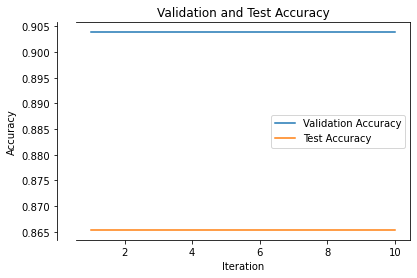

(0.9038461538461539, 0.8653846153846154)

In [11]:
from sklearn.model_selection import train_test_split
import os
import cv2
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

def train_accuracy():

    data_dir = "test_accuracy"
    path = [os.path.join(data_dir, file) for file in os.listdir(data_dir)]

    faces = []
    ids = []

    for image in path:
        img = Image.open(image).convert('L')
        imageNp = np.array(img, 'uint8')
        id = int(os.path.split(image)[1].split('.')[0])

        faces.append(imageNp)
        ids.append(id)

    ids = np.array(ids)

    # Split data into training, validation, and test sets
    X_train, X_test, y_train, y_test = train_test_split(faces, ids, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    # Train the face recognizer on the training set
    face_recognizer = cv2.face.LBPHFaceRecognizer_create()
    face_recognizer.train(X_train, y_train)

    # Evaluate the model on the validation set
    correct_val = 0
    total_val = 0
    for i in range(len(X_val)):
        pred_id, confidence = face_recognizer.predict(X_val[i])
        if pred_id == y_val[i]:
            correct_val += 1
        total_val += 1

    accuracy_val = correct_val / total_val

    # Evaluate the model on the test set
    correct_test = 0
    total_test = 0
    for i in range(len(X_test)):
        pred_id, confidence = face_recognizer.predict(X_test[i])
        if pred_id == y_test[i]:
            correct_test += 1
        total_test += 1

    accuracy_test = correct_test / total_test

    return accuracy_val, accuracy_test

val_accs = []
test_accs = []

for i in range(10):
    val_acc, test_acc = train_accuracy()
    val_accs.append(val_acc)
    test_accs.append(test_acc)

plt.plot(range(1, 11), val_accs, label='Validation Accuracy')
plt.plot(range(1, 11), test_accs, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Validation and Test Accuracy')
plt.gca().spines['left'].set_position('zero')
plt.legend()
plt.show()
train_accuracy()